In [1]:
import numpy as np
import matplotlib.pyplot as plt

def rounding(n):
    return round(round(n,3)+0.001,3) if (round(n,3)*1000)%2!=0 else round(n,3)

def sinys(t,amplisuda,L):
    return amplisuda*np.sin(np.pi*t/L)

def solve(k1,k2,k3,c1,c2,c3,m1,m2,m3,h1,a1,a2,T,I1,I3,L,A,t,t_voz,delta_t=0.002,gamma = 0.5,betta = 0.25):
    T = [round(i,3) for i in np.arange(0,(T+0.001),delta_t)]
    N = len(T)
    t_matrix = [rounding(t)]
    n_it1t = int((t_voz/L)/delta_t)
    sinus = np.array([sinys(r,A,L) for r in np.linspace(0,1,n_it1t)])
    K_diag = np.diag([k1,k2,k3])
    D = np.array([[1,-a1,0,-1,h1],
    [1,a2,-1,0,0],
    [0,0,0,1,0]])
    K = np.transpose(D)@K_diag@D
    C_diag = np.diag([c1,c2,c3])
    C = np.array([[1,-a1,0,-1,h1],
    [1,a2,-1,0,0],
    [0,0,0,1,0]])
    C = np.transpose(C)@C_diag@C
    M = np.diag([m1,I1,m2,m3,I3])
    n = D.shape[0]
    y_voz = np.zeros((n+1,N))
    y_voz[0,:] = T
    index_t = [np.where(y_voz[0,:] == i)[-1][-1] for i in t_matrix]
    for i in index_t:
        y_voz[n,i:] =  np.concatenate([sinus,np.zeros((N-n_it1t-i))])
        n+=1
    y_impact = y_voz[1:,:]
    M_reverse = np.linalg.inv(M+delta_t*gamma*C+delta_t**2*betta*K)
    K_diag_transpose = np.transpose(D)@K_diag
    X = np.zeros((K_diag_transpose.shape[0],1))
    X_t = np.zeros((K_diag_transpose.shape[0],1))
    X_tt = np.zeros((K_diag_transpose.shape[0],1))
    for i in range(N-1):
        F = K_diag_transpose@y_impact[:,i+1]-C@(X_t[:,-1]+delta_t*(1-gamma)*X_tt[:,-1])-K@(X[:,-1]+delta_t*X_t[:,-1]+1/2*delta_t**2*(1-2*betta)*X_tt[:,-1])
        X_tt = np.concatenate([X_tt,(np.dot(F,M_reverse)).reshape(-1,1)],axis =1)
        X_tn = X_t[:,i]+delta_t*(gamma*X_tt[:,-1]+(1-gamma)*X_tt[:,i])
        X_t = np.concatenate([X_t,X_tn.reshape(-1,1)],axis =1)
        X_n = X[:,i]+delta_t*X_t[:,i]+0.5*(delta_t**2)*(2*betta*X_tt[:,-1]+(1-2*betta)*X_tt[:,i])
        X = np.concatenate([X,X_n.reshape(-1,1)],axis =1)
    return X,X_t,X_tt,T



X,X_t,X_tt,T = solve(30,15,40,50,60,50,90,90,90,1,1,1,10,12000,12000,2,0.25,0,2)

num = ['m1','I1','m2','m3','I3']
lol = 'k1,k2,k3,c1,c2,c3,m1,m2,m3,h1,a1,a2,T,I1,I3,L,A,t,t_voz'.split(',')
lol2 = '30,15,40,50,60,50,90,90,90,1,1,1,10,12000,12000,2,0.25,0,2'.split(',')
print(*[f'{lol[i]} = {lol2[i]},' for i in range(len(lol))])

k1 = 30, k2 = 15, k3 = 40, c1 = 50, c2 = 60, c3 = 50, m1 = 90, m2 = 90, m3 = 90, h1 = 1, a1 = 1, a2 = 1, T = 10, I1 = 12000, I3 = 12000, L = 2, A = 0.25, t = 0, t_voz = 2,


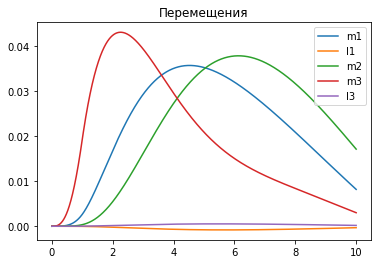

In [2]:
for  i in range(len(X)):
    plt.title('Перемещения')
    plt.plot(T,X[i], label = f'{num[i]}')
    plt.legend()

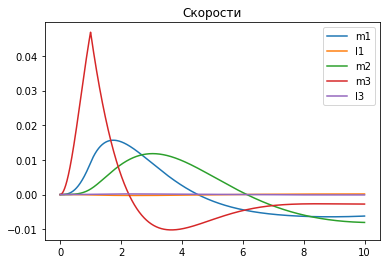

In [3]:
for  i in range(len(X_t)):
    plt.title('Скорости')
    plt.plot(T,X_t[i], label = f'{num[i]}')
    plt.legend()

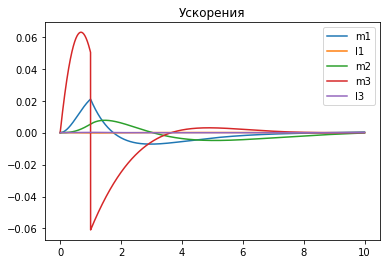

In [4]:
for  i in range(len(X_tt)):
    plt.title('Ускорения')
    plt.plot(T,X_tt[i], label = f'{num[i]}')
    plt.legend()